In [42]:
%load_ext autoreload

%autoreload 2
%aimport AD_predictor_tools
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using existing Tiling DF at ../data/TilingDFs/wt_ADs_size_39_space_1_AAs_W,F,L.csv
There are 48 proteins
Using existing Tiling DF at ../data/TilingDFs/wt_ADs_size_39_space_1_AAs_W,F,Y,M,L,Q.csv
243     6
244     6
245     6
246     6
253     6
       ..
7314    9
7315    9
7316    9
7319    8
7320    8
Name: AllHydros, Length: 105, dtype: int64
seaborn adjustment: -21
There are 105 regions of length 39 AA as extreme or more than this AD
These regions come from 6 proteins

---
There are 7 predicted candidate AD regions on 6 TFs
There are 48 proteins
Saving output to: ../output/predictions/0000wt_ADs_s_001_lcc_VP16_lch_006_ucc_-08_uch_CITED2_lcs1_inf_lcs2_000_lcs1_inf_ucs2_inf_comp_WFL_tl_039_ws_001_ps1_Charge_ps2_AllHydros


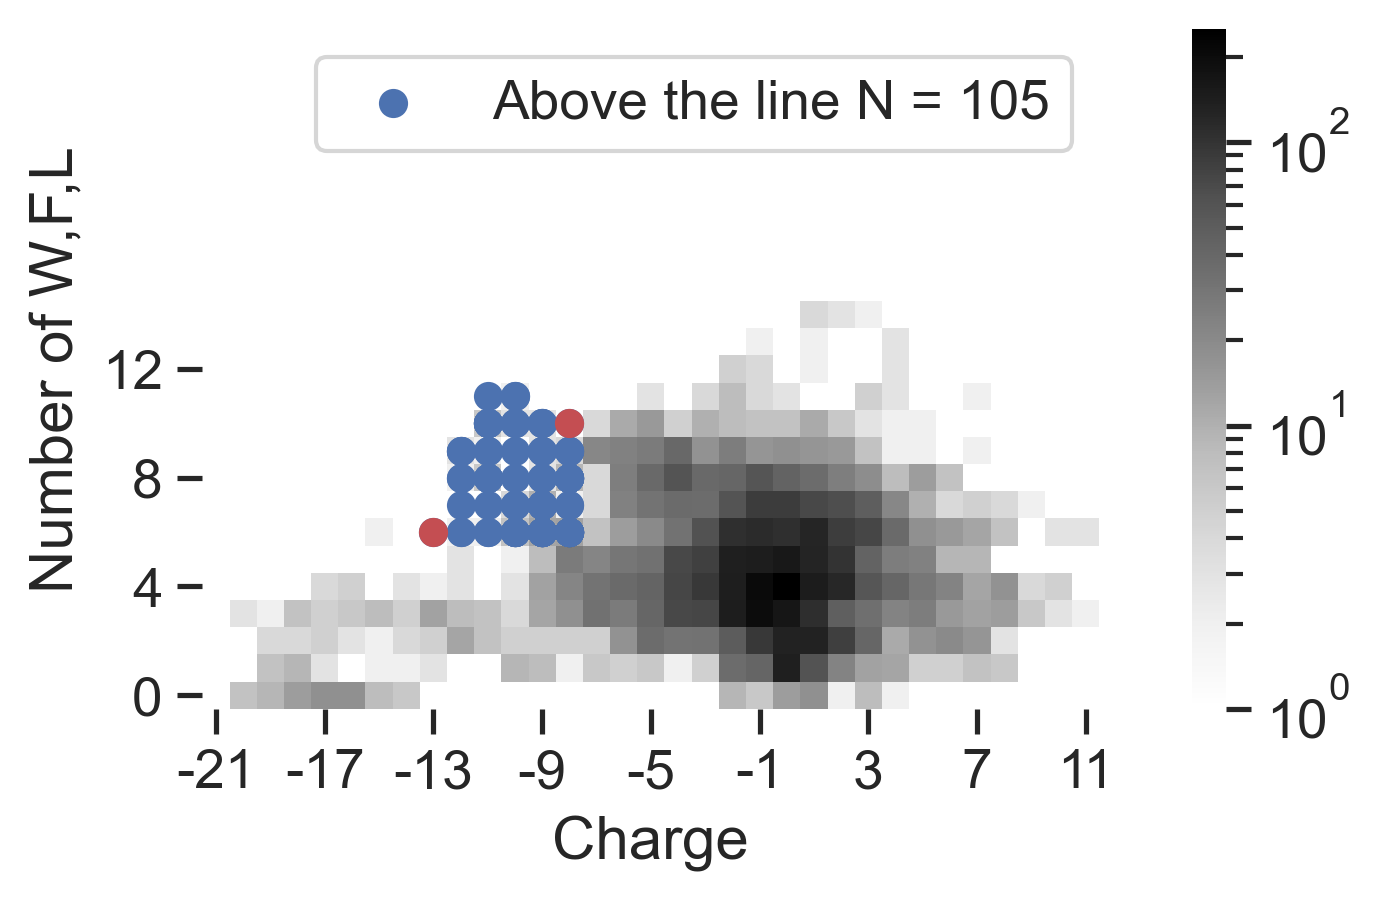

In [43]:
wt_preds = AD_predictor_tools.make_predictions(folder_name="predictions/",
                        inputfilename="../../SFARI/soto_analysis/data/wt_ADs.fasta", 
                        slope=1,
                        lower_corner_c="VP16",lower_corner_h=6,
                        upper_corner_c=-8,upper_corner_h="CITED2",
                        LowerCorner_slope1='inf', LowerCorner_slope2=0,
                        UpperCorner_slope1='inf', UpperCorner_slope2='inf',
                        composition=["W","F","L"],
                        window_size=39,
                        window_spacing=1,
                        propset=["Charge","AllHydros"])

In [39]:
wt_preds

,GeneName,Start,End,Length,RegionType,ProteinRegionSeq
0,NCOA1_Q15788_AD_840-1011,75,113,38,Prediction,ELLCPPTTVEGRNDEKALLEQLVSFLSGKDETELAELD
1,SRCAP_Q6ZRS2_AD_198-1445,100,142,42,Prediction,DDEETIEVEEQQEGNDAEAQRREIELLRREGELPLEELLRSL
2,SRCAP_Q6ZRS2_AD_198-1445,215,264,49,Prediction,EEDTIAAEEQLEGEVDHAMELSELAREGELSMEELLQQYAGAYAPGSGS
3,TFE3_P19532_AD_472-575,18,79,61,Prediction,QQPPAPPSDALLDLHFPSDHLGDLGDPFHLGLEDILMEEEEGVVGG...
4,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,115,184,69,Prediction,PVDNHMRNLTSQDLLYDLDINIFDEINLMSLATEDNFDPIDVSQLF...
5,SRCAP_Q6ZRS2_AD_2575-3230,32,108,76,Prediction,PSLTLEAGSIPNGQEQEAPDSAEGTTLTVLPEGEELPLCVSESNGL...
6,TFE3_P19532_AD_212-333,47,87,40,Prediction,KEIDDVIDEIISLESSYNDEMLSYLPGGTTGLQLPSTLPV


In [5]:
import protfasta

# Number of wt ADs
wt_input = protfasta.read_fasta("../../SFARI/soto_analysis/data/wt_ADs.fasta")
len(wt_input)

48

In [6]:
wt_seqs = pd.DataFrame({"AD" : wt_input.keys(), "seq" : wt_input.values()})

In [7]:
wt_seqs["charge"] = wt_seqs["seq"].str.count("R") + wt_seqs["seq"].str.count("K") \
    - wt_seqs["seq"].str.count("E") - wt_seqs["seq"].str.count("D") 
wt_seqs

,AD,seq,charge
0,GLIS1_Q8NBF1_AD_447-620,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-9
1,RORA_P35398_AD_272-385,ELEHLAQNISKSHLETCQYLREELQQITWQTFLQEEIENYQNKQRE...,-6
2,SRCAP_Q6ZRS2_AD_2575-3230,SSLSLVPPKDLLPVAVEILPVSEKNLSLTPSAPSLTLEAGSIPNGQ...,9
3,NCOA1_Q15788_AD_840-1011,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,-12
4,SRCAP_Q6ZRS2_AD_198-1445,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-47
5,ERG_P11308_AD_118-261,MTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVNILLFQNI...,-2
6,CAMTA2_O94983_AD_472-581,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,-11
7,EBF3_Q9H4W6_AD_281-360,VIIIGDNFFDGLQVVFGTMLVWSELITPHAIRVQTPPRHIPGVVEV...,1
8,YY1_P25490_AD_1-69,MASGDTLYIATDGSEMPAEIVELHEIEVETIPVETIETTVVGEEEE...,-22
9,MTF1_Q14872_AD_510-624,AAVASAVAAPAPPQSTTEPLPAMVQTLPLGANSVLTNNPTITITPT...,-2


In [8]:
wt_seqs[wt_seqs["charge"] < -3]

,AD,seq,charge
0,GLIS1_Q8NBF1_AD_447-620,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-9
1,RORA_P35398_AD_272-385,ELEHLAQNISKSHLETCQYLREELQQITWQTFLQEEIENYQNKQRE...,-6
3,NCOA1_Q15788_AD_840-1011,VTSVTIKSEILPASLQSATARPTSRLNRLPELELEAIDNQFGQPGT...,-12
4,SRCAP_Q6ZRS2_AD_198-1445,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-47
6,CAMTA2_O94983_AD_472-581,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,-11
8,YY1_P25490_AD_1-69,MASGDTLYIATDGSEMPAEIVELHEIEVETIPVETIETTVVGEEEE...,-22
12,MTF1_Q14872_AD_328-509,GSEDTNHSLCLSDLSLLSTDSELRENSSTTQGQDLSTISPAIIFES...,-18
13,TBX22_Q9Y458_AD_402-481,SLAPLMMEVPMLSSLGVTNSKSGSSEDSSDQYLQAPNSTNQMLYGL...,-4
14,NCOA1_Q15788_AD_1241-1385,GEANFAPSLSPGSSMVPMPIPPPQSSLLQQTPPASGYQSPDMKAWQ...,-4
15,ARNT2_Q9HBZ2_AD_524-717,QGSPFPSGHSGKAFSSSVVHVPGVNDIQSSSSTGQNMSQISRQLNQ...,-6


In [9]:
len(wt_seqs[wt_seqs["charge"] < -3])

25

In [10]:
# Number of wt ADs containing at least one predicted AD
wt_AD_results = pd.DataFrame({"AD" : wt_input.keys()})
wt_AD_results["contains_active_pred"] = wt_AD_results["AD"].isin(wt_preds["GeneName"])
wt_AD_results

,AD,contains_active_pred
0,GLIS1_Q8NBF1_AD_447-620,False
1,RORA_P35398_AD_272-385,False
2,SRCAP_Q6ZRS2_AD_2575-3230,True
3,NCOA1_Q15788_AD_840-1011,True
4,SRCAP_Q6ZRS2_AD_198-1445,True
5,ERG_P11308_AD_118-261,False
6,CAMTA2_O94983_AD_472-581,False
7,EBF3_Q9H4W6_AD_281-360,False
8,YY1_P25490_AD_1-69,False
9,MTF1_Q14872_AD_510-624,False


Using existing Tiling DF at ../data/TilingDFs/long_variant_ADs_size_39_space_1_AAs_W,F,Y,M,L,Q.csv
There are 3010 proteins
Using existing Tiling DF at ../data/TilingDFs/long_variant_ADs_size_39_space_1_AAs_W,F,Y,M,L,Q.csv
11295      6
11296      6
11297      6
11298      6
11305      6
          ..
1245327    9
1245328    9
1245329    9
1245332    8
1245333    8
Name: AllHydros, Length: 21204, dtype: int64
seaborn adjustment: -21
There are 21204 regions of length 39 AA as extreme or more than this AD
These regions come from 955 proteins

---
There are 1363 predicted candidate AD regions on 955 TFs
There are 3010 proteins
Saving output to: ../output/predictions/long_variant_ADs_s_001_lcc_VP16_lch_006_ucc_-08_uch_CITED2_lcs1_inf_lcs2_000_lcs1_inf_ucs2_inf_comp_WFL_tl_039_ws_001_ps1_Charge_ps2_AllHydros


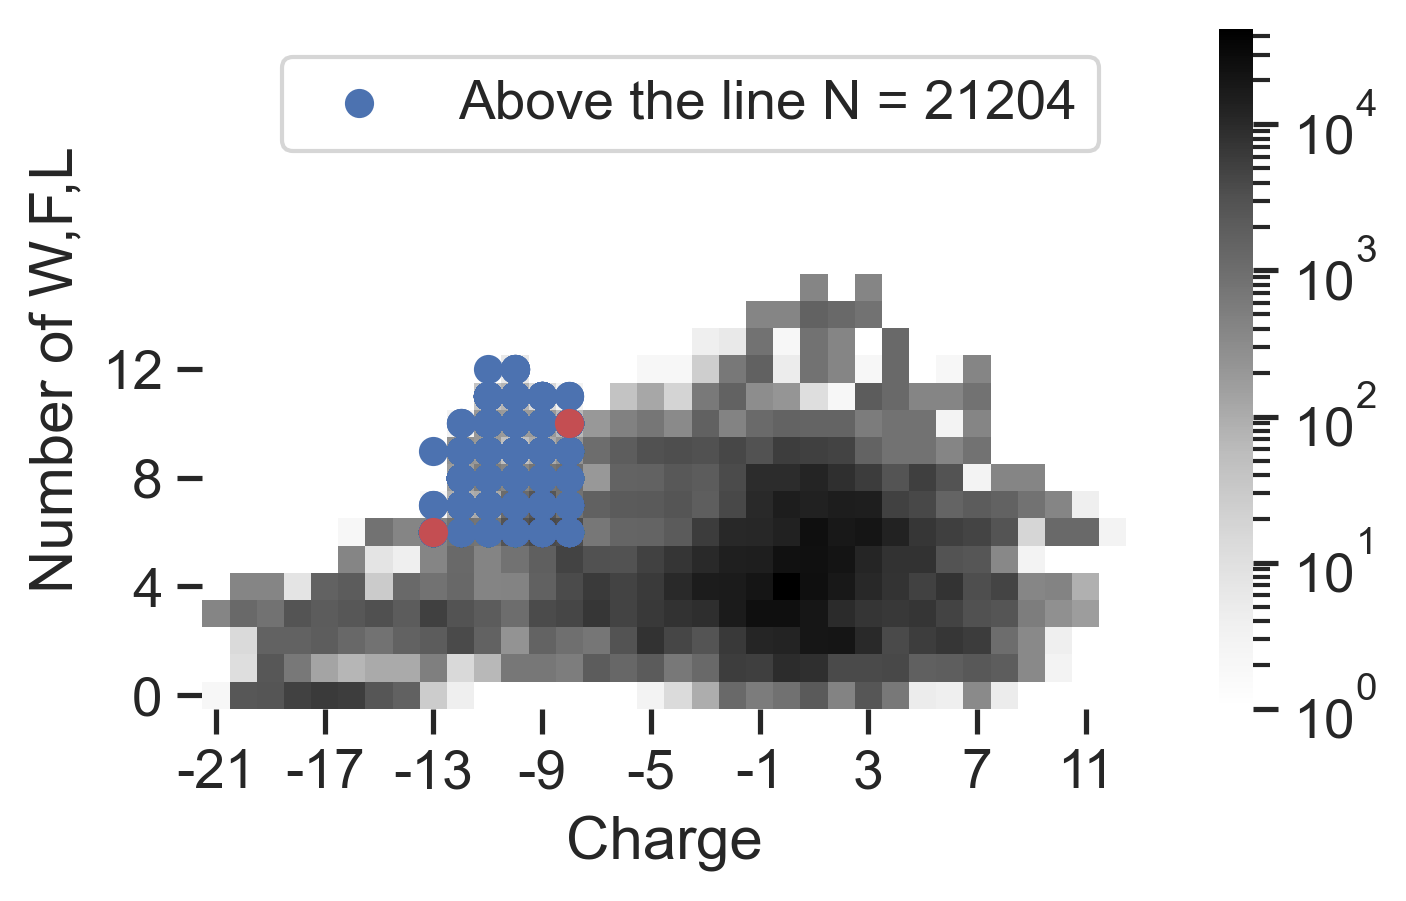

In [11]:
variant_preds = AD_predictor_tools.make_predictions(folder_name="predictions/",
                        inputfilename="../../SFARI/soto_analysis/data/long_variant_ADs.fasta", 
                        slope=1,
                        lower_corner_c="VP16",lower_corner_h=6,
                        upper_corner_c=-8,upper_corner_h="CITED2",
                        LowerCorner_slope1='inf', LowerCorner_slope2=0,
                        UpperCorner_slope1='inf', UpperCorner_slope2='inf',
                        composition=["W","F","L"],
                        window_size=39,
                        window_spacing=1,
                        propset=["Charge","AllHydros"])

In [12]:
# Number of wt AD variants
variant_input = protfasta.read_fasta("../../SFARI/soto_analysis/data/long_variant_ADs.fasta")
variant_input_df = pd.DataFrame({"AD" : variant_input.keys()})
variant_input_df["AD"] = variant_input_df["AD"].str.split("|").str[0]
variant_input_df = pd.DataFrame(variant_input_df.value_counts()).reset_index().rename(columns = {0 : "count"})
variant_input_df

,AD,count
0,SRCAP_Q6ZRS2_AD_198-1445,408
1,SRCAP_Q6ZRS2_AD_2575-3230,336
2,HIVEP3_Q5T1R4_AD_211-1074,336
3,TCF20_Q9UGU0_AD_1-327,119
4,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98
5,NR1D1_P20393_AD_8-285,89
6,CASZ1_Q86V15_AD_31-185,87
7,ESR2_Q92731_AD_304-500,76
8,GLIS1_Q8NBF1_AD_447-620,75
9,MYT1L_Q9UL68_AD_152-425,69


In [15]:
variant_preds["AD"] = variant_preds["GeneName"].str.split("|").str[0]
variant_preds

,GeneName,Start,End,Length,RegionType,ProteinRegionSeq,AD
0,SRCAP_Q6ZRS2_AD_2575-3230|g.30738021G>A(p.Asp2...,32,106,74,Prediction,PSLTLEAGSIPNGQEQEAPDSAEGTTLTVLPEGEELPLCVSESNGL...,SRCAP_Q6ZRS2_AD_2575-3230
1,SRCAP_Q6ZRS2_AD_198-1445|g.30720854A>C(p.Gln10...,100,142,42,Prediction,DDEETIEVEEQQEGNDAEAQRREIELLRREGELPLEELLRSL,SRCAP_Q6ZRS2_AD_198-1445
2,SRCAP_Q6ZRS2_AD_198-1445|g.30720854A>C(p.Gln10...,215,264,49,Prediction,EEDTIAAEEQLEGEVDHAMELSELAREGELSMEELLQQYAGAYAPGSGS,SRCAP_Q6ZRS2_AD_198-1445
3,NFE2L3-NF2L3_Q9Y4A8_AD_252-451|g.26184767C>T(p...,115,184,69,Prediction,PVDNHMRNLTSQDLLYDLDINIFDEINLMSLATEDNFDPIDVSQLF...,NFE2L3-NF2L3_Q9Y4A8_AD_252-451
4,SRCAP_Q6ZRS2_AD_2575-3230|g.30738679C>G(p.Ala2...,32,108,76,Prediction,PSLTLEAGSIPNGQEQEAPDSAEGTTLTVLPEGEELPLCVSESNGL...,SRCAP_Q6ZRS2_AD_2575-3230
...,...,...,...,...,...,...,...
1358,SRCAP_Q6ZRS2_AD_198-1445|g.30722713C>G(p.Pro12...,100,142,42,Prediction,DDEETIEVEEQQEGNDAEAQRREIELLRREGELPLEELLRSL,SRCAP_Q6ZRS2_AD_198-1445
1359,SRCAP_Q6ZRS2_AD_198-1445|g.30722713C>G(p.Pro12...,215,264,49,Prediction,EEDTIAAEEQLEGEVDHAMELSELAREGELSMEELLQQYAGAYAPGSGS,SRCAP_Q6ZRS2_AD_198-1445
1360,SRCAP_Q6ZRS2_AD_2575-3230|g.30739380A>G(p.Thr3...,32,108,76,Prediction,PSLTLEAGSIPNGQEQEAPDSAEGTTLTVLPEGEELPLCVSESNGL...,SRCAP_Q6ZRS2_AD_2575-3230
1361,SRCAP_Q6ZRS2_AD_198-1445|g.30721467C>T(p.Arg11...,100,142,42,Prediction,DDEETIEVEEQQEGNDAEAQRREIELLRREGELPLEELLRSL,SRCAP_Q6ZRS2_AD_198-1445


In [24]:
pd.DataFrame(variant_preds["AD"].value_counts()).reset_index()

,index,AD
0,SRCAP_Q6ZRS2_AD_198-1445,816
1,SRCAP_Q6ZRS2_AD_2575-3230,336
2,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98
3,NCOA1_Q15788_AD_840-1011,44
4,TFE3_P19532_AD_472-575,40
5,TFE3_P19532_AD_212-333,21
6,KLF7_O75840_AD_2-101,3
7,MYT1L_Q9UL68_AD_152-425,2
8,ARNT2_Q9HBZ2_AD_524-717,2
9,TFE3_P19532_AD_1-127,1


In [29]:
merged_df = pd.merge(variant_input_df, pd.DataFrame(variant_preds["AD"].value_counts()).reset_index(), how = "inner", left_on = "AD", right_on = "index")
merged_df

,AD_x,count,index,AD_y
0,SRCAP_Q6ZRS2_AD_198-1445,408,SRCAP_Q6ZRS2_AD_198-1445,816
1,SRCAP_Q6ZRS2_AD_2575-3230,336,SRCAP_Q6ZRS2_AD_2575-3230,336
2,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98
3,MYT1L_Q9UL68_AD_152-425,69,MYT1L_Q9UL68_AD_152-425,2
4,ARNT2_Q9HBZ2_AD_524-717,49,ARNT2_Q9HBZ2_AD_524-717,2
5,NCOA1_Q15788_AD_840-1011,47,NCOA1_Q15788_AD_840-1011,44
6,TFE3_P19532_AD_472-575,40,TFE3_P19532_AD_472-575,40
7,TFE3_P19532_AD_1-127,27,TFE3_P19532_AD_1-127,1
8,KLF7_O75840_AD_2-101,27,KLF7_O75840_AD_2-101,3
9,TFE3_P19532_AD_212-333,23,TFE3_P19532_AD_212-333,21


In [30]:
merged_df = merged_df.rename(columns = {"count" : "Number of variants",
                                       "AD_y" : "Number of predictions in variants"})
merged_df

,AD_x,Number of variants,index,Number of predictions in variants
0,SRCAP_Q6ZRS2_AD_198-1445,408,SRCAP_Q6ZRS2_AD_198-1445,816
1,SRCAP_Q6ZRS2_AD_2575-3230,336,SRCAP_Q6ZRS2_AD_2575-3230,336
2,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98,NFE2L3-NF2L3_Q9Y4A8_AD_252-451,98
3,MYT1L_Q9UL68_AD_152-425,69,MYT1L_Q9UL68_AD_152-425,2
4,ARNT2_Q9HBZ2_AD_524-717,49,ARNT2_Q9HBZ2_AD_524-717,2
5,NCOA1_Q15788_AD_840-1011,47,NCOA1_Q15788_AD_840-1011,44
6,TFE3_P19532_AD_472-575,40,TFE3_P19532_AD_472-575,40
7,TFE3_P19532_AD_1-127,27,TFE3_P19532_AD_1-127,1
8,KLF7_O75840_AD_2-101,27,KLF7_O75840_AD_2-101,3
9,TFE3_P19532_AD_212-333,23,TFE3_P19532_AD_212-333,21


In [32]:
merged_df = merged_df[merged_df["index"].isin(wt_preds["GeneName"])]
merged_df

,AD_x,Number of variants,index,Number of predictions in variants
0,SRCAP_Q6ZRS2_AD_198-1445,408,SRCAP_Q6ZRS2_AD_198-1445,816
1,SRCAP_Q6ZRS2_AD_2575-3230,336,SRCAP_Q6ZRS2_AD_2575-3230,336
5,NCOA1_Q15788_AD_840-1011,47,NCOA1_Q15788_AD_840-1011,44
6,TFE3_P19532_AD_472-575,40,TFE3_P19532_AD_472-575,40
9,TFE3_P19532_AD_212-333,23,TFE3_P19532_AD_212-333,21


Text(0, 0.5, 'Count')

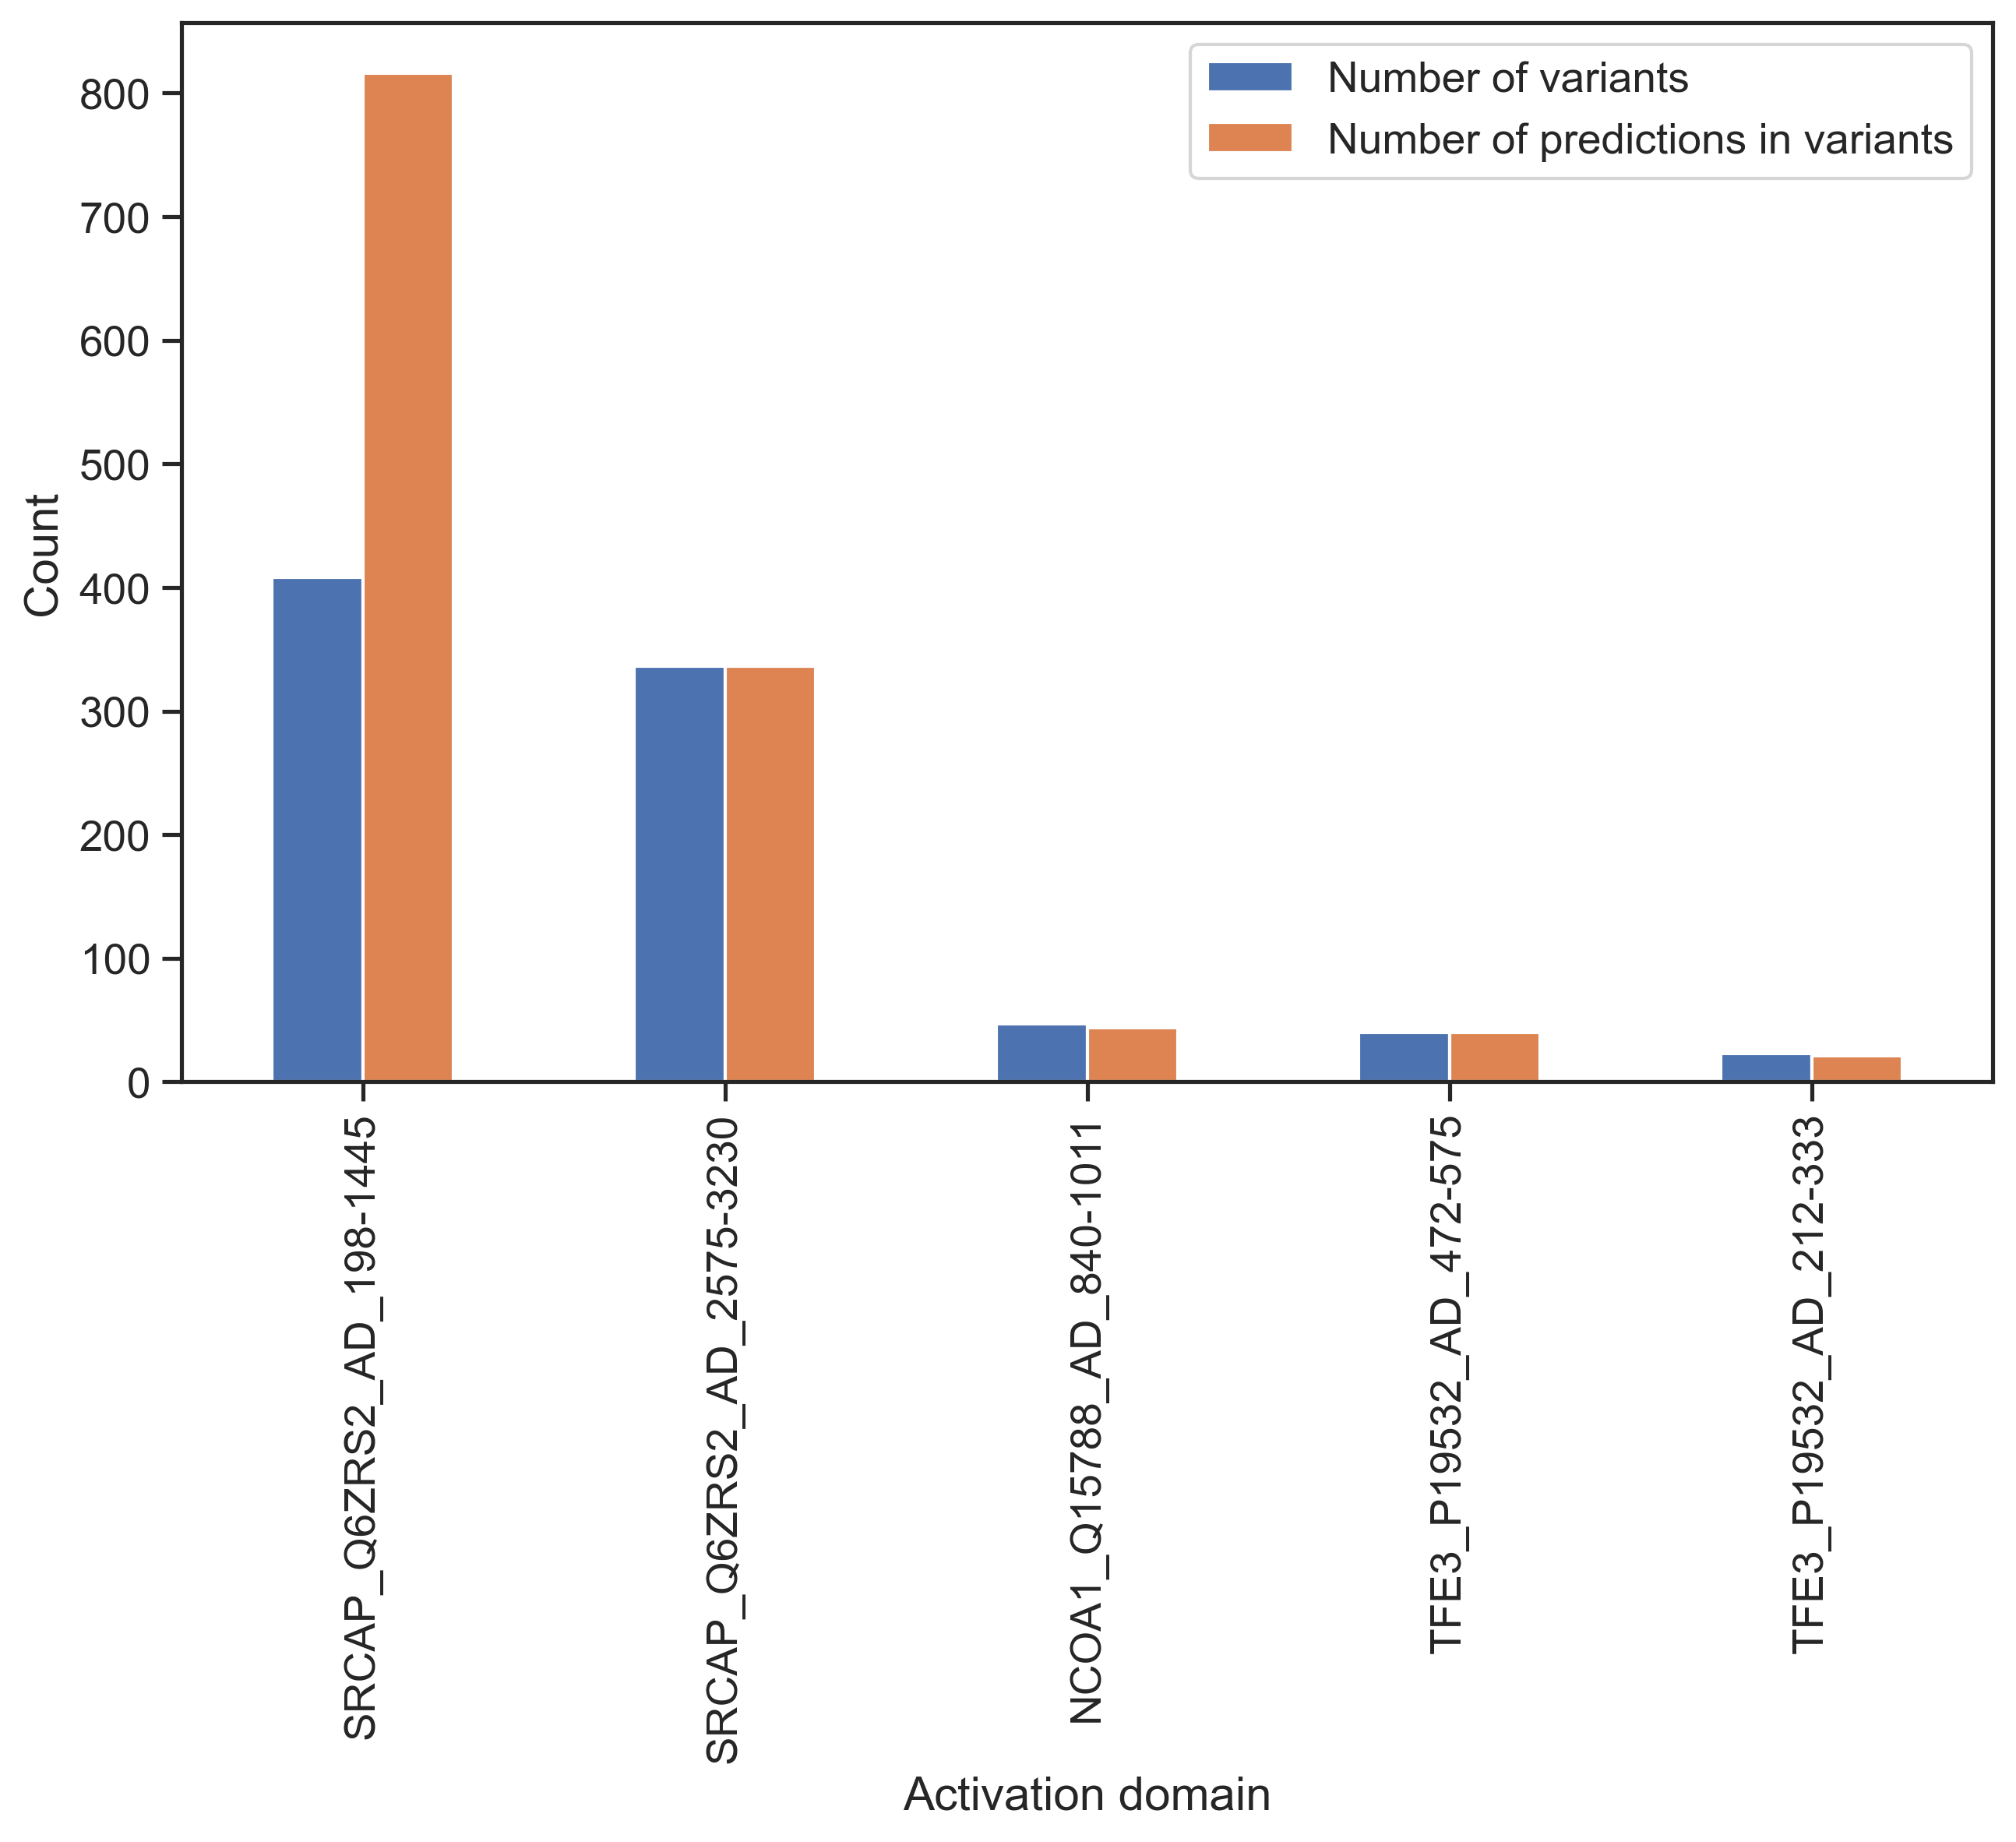

In [35]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
merged_df.plot(x = "index", y = ["Number of variants", "Number of predictions in variants"], 
               kind = "bar", figsize=(10,6))
plt.xlabel("Activation domain")
plt.ylabel("Count")

In [93]:
variant_results = pd.DataFrame({"AD" : variant_input.keys()})
variant_results["AD"] = variant_results["AD"].str.split("|").str[0]
variant_results = variant_results.drop_duplicates().reset_index(drop = True)
variant_results

,AD
0,GLIS1_Q8NBF1_AD_447-620
1,RORA_P35398_AD_272-385
2,SRCAP_Q6ZRS2_AD_2575-3230
3,NCOA1_Q15788_AD_840-1011
4,SRCAP_Q6ZRS2_AD_198-1445
5,ERG_P11308_AD_118-261
6,CAMTA2_O94983_AD_472-581
7,EBF3_Q9H4W6_AD_281-360
8,YY1_P25490_AD_1-69
9,MTF1_Q14872_AD_510-624


In [94]:
variant_results["var_contains_active_pred"] = variant_results["AD"].isin(variant_preds["AD"])
variant_results

,AD,var_contains_active_pred
0,GLIS1_Q8NBF1_AD_447-620,False
1,RORA_P35398_AD_272-385,False
2,SRCAP_Q6ZRS2_AD_2575-3230,True
3,NCOA1_Q15788_AD_840-1011,True
4,SRCAP_Q6ZRS2_AD_198-1445,True
5,ERG_P11308_AD_118-261,False
6,CAMTA2_O94983_AD_472-581,False
7,EBF3_Q9H4W6_AD_281-360,False
8,YY1_P25490_AD_1-69,False
9,MTF1_Q14872_AD_510-624,False


In [96]:
merged_results = pd.merge(wt_AD_results, variant_results, on = "AD")
merged_results

,AD,wt_contains_active_pred,var_contains_active_pred
0,GLIS1_Q8NBF1_AD_447-620,False,False
1,RORA_P35398_AD_272-385,False,False
2,SRCAP_Q6ZRS2_AD_2575-3230,True,True
3,NCOA1_Q15788_AD_840-1011,True,True
4,SRCAP_Q6ZRS2_AD_198-1445,True,True
5,ERG_P11308_AD_118-261,False,False
6,CAMTA2_O94983_AD_472-581,False,False
7,EBF3_Q9H4W6_AD_281-360,False,False
8,YY1_P25490_AD_1-69,False,False
9,MTF1_Q14872_AD_510-624,False,False


In [102]:
merged_results[merged_results["wt_contains_active_pred"] != merged_results["var_contains_active_pred"]]

,AD,wt_contains_active_pred,var_contains_active_pred
15,ARNT2_Q9HBZ2_AD_524-717,False,True
17,MYT1L_Q9UL68_AD_152-425,False,True
20,TFE3_P19532_AD_1-127,False,True
27,KLF7_O75840_AD_2-101,False,True


In [103]:
merged_results[merged_results["wt_contains_active_pred"]]

,AD,wt_contains_active_pred,var_contains_active_pred
2,SRCAP_Q6ZRS2_AD_2575-3230,True,True
3,NCOA1_Q15788_AD_840-1011,True,True
4,SRCAP_Q6ZRS2_AD_198-1445,True,True
25,TFE3_P19532_AD_212-333,True,True
46,TFE3_P19532_AD_472-575,True,True
